In [1]:
from scipy.stats import kendalltau
import numpy as np
import wiggum as wg
import pandas as pd
import seaborn as sns

In [2]:
labeled_df = wg.LabeledDataFrame('../wiggum_app/static/data/rateSPdataDeptRace.csv')
labeled_df.infer_var_types()
roles = {'department':['groupby','trend'],'gender':['groupby','trend'],'decision':'trend','race':['groupby','trend']}
var_types = {'gender':'categorical','department':'categorical'}

labeled_df.set_roles(roles)
labeled_df.set_var_types(var_types)
labeled_df.meta_df

,dtype,var_type,role,isCount,weighting_var
variable,,,,,
department,int64,categorical,"[groupby, trend]",NaN,NaN
gender,object,categorical,"[groupby, trend]",NaN,NaN
decision,int64,binary,trend,NaN,NaN
race,object,categorical,"[groupby, trend]",NaN,NaN


In [3]:
rankobj = wg.Mean_Rank_Trend()
linreg_obj = wg.All_Linear_Trend()
labeled_df.get_subgroup_trends_1lev([rankobj,linreg_obj])
labeled_df.add_distance()
labeled_df.result_df.sample(10)
# this is a random samepl fo the result table

,feat1,feat2,subgroup_trend,subgroup_trend_strength,subgroup,group_feat,trend_type,agg_trend,agg_trend_strength,distance
14,decision,department,"[1, 0, 2, 3]",0.0594,M,gender,rank_trend,"[1, 0, 3, 2]",0.011,0.1667
8,decision,race,"[B, W, H]",0.0025,1,department,rank_trend,"[B, H, W]",0.022,0.3333
11,decision,race,"[B, W, H]",0.0310,F,gender,rank_trend,"[B, H, W]",0.022,0.3333
16,decision,department,"[0, 1, 3, 2]",0.0799,H,race,rank_trend,"[1, 0, 3, 2]",0.011,0.1667
7,decision,race,"[H, B, W]",0.0957,0,department,rank_trend,"[B, H, W]",0.022,0.3333
9,decision,race,"[B, W, H]",0.0818,2,department,rank_trend,"[B, H, W]",0.022,0.3333
5,decision,gender,"[M, F]",0.0615,H,race,rank_trend,"[F, M]",0.026,1.0000
17,decision,department,"[1, 0, 3, 2]",0.0494,W,race,rank_trend,"[1, 0, 3, 2]",0.011,0.0000
1,decision,gender,"[M, F]",0.0912,1,department,rank_trend,"[F, M]",0.026,1.0000
3,decision,gender,"[M, F]",0.0002,3,department,rank_trend,"[F, M]",0.026,1.0000


In [4]:
# interim calculation to get the data for the heatmpas
# do this for each subgroup for each group_feat in result_df
# each one will be one heatmap's data
bvm_df = labeled_df.get_trend_rows(group_feat='race',subgroup=['H'])
bvm_df

2  total rows meet the criteria


,feat1,feat2,subgroup_trend,subgroup_trend_strength,subgroup,group_feat,trend_type,agg_trend,agg_trend_strength,distance
5,decision,gender,"[M, F]",0.0615,H,race,rank_trend,"[F, M]",0.026,1.0000
16,decision,department,"[0, 1, 3, 2]",0.0799,H,race,rank_trend,"[1, 0, 3, 2]",0.011,0.1667


In [5]:
# reformat to the heatmap shape
heatmap = bvm_df.pivot(index='feat1', columns='feat2', values='distance')
heatmap

feat2,department,gender
feat1,,
decision,0.1667,1.0


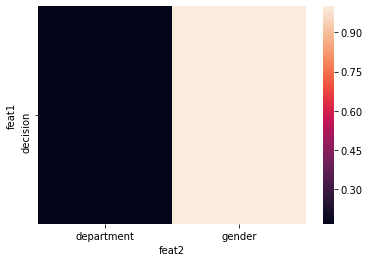

In [6]:
sns.heatmap(heatmap,)

In [10]:
# iterate over the groupby variables
for gby in pd.unique(labeled_df.result_df['group_feat']):
    # groupby the values of the curent groupby varialbe
    cgby = labeled_df.get_trend_rows(group_feat=gby).groupby('subgroup')
    # iterate over the values of the groupby
    for gby_lev,df in cgby:
        heatmap = df.pivot(index='feat1', columns='feat2', values='distance')
#         plt.figure()
#         sns.heatmap(heatmap)

8  total rows meet the criteria


NameError: name 'plt' is not defined